Resample time series data from hourly to daily, monthly, or yearly using pandas.

# Resample Time Series Data Using Pandas Dataframes

Often you need to summarize or aggregate time series data by a new time period. For instance, you may want to summarize hourly data to provide a daily maximum value

- resample() method for pandas dataframes that have a datetime index.

### Import Packages and Get Data

Before using the data, consider a few things about how it was collected:

- The data were collected over several decades, and the data were not always collected consistently.
- The data are not cleaned. You may find heading names that are not meaningful, and other issues with the data that need to be explored.

In [10]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [11]:
# Import data using datetime and no data value
precip_2003_2013_hourly = pd.read_csv('C:/capes_sql/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv',
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])

# View first few rows
precip_2003_2013_hourly.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


###  Precipitation Data

The structure of the data is similar to what you saw in previous lessons. The HPCP column contains the total precipitation given in inches, recorded for the hour ending at the time specified by DATE. Note that if there is no precipitation recorded in a particular hour, then no value is recorded.

In [12]:
precip_2003_2013_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1840 entries, 2003-01-01 01:00:00 to 2013-12-31 00:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   HPCP              1746 non-null   float64
 6   Measurement Flag  1840 non-null   object 
 7   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(4)
memory usage: 129.4+ KB


In [13]:
precip_2003_2013_hourly.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [14]:
# View index values of dataframe
precip_2003_2013_hourly.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

# Plot Hourly Precipitation Data

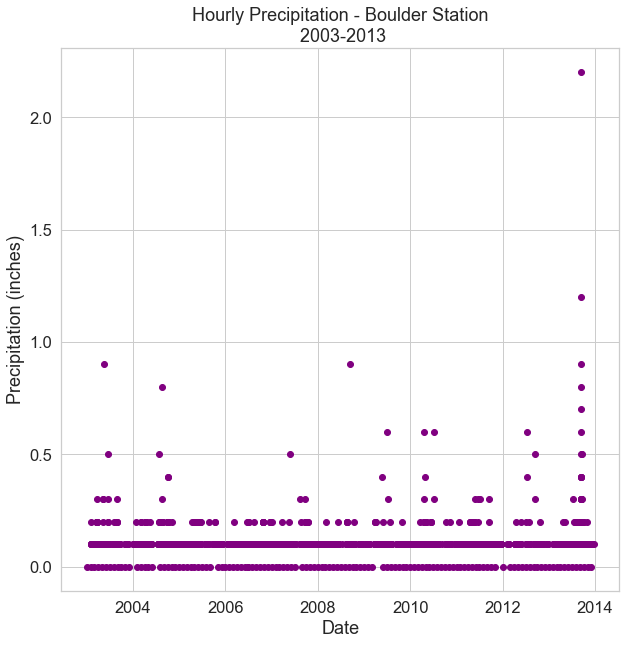

In [15]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_hourly.index.values,
           precip_2003_2013_hourly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Hourly Precipitation - Boulder Station\n 2003-2013")

plt.show()

notice that there are often multiple records for a single day.

# Resample Hourly Data to Daily Data

### .resample() method

for a time period, you can take all of the values for each day and summarize them.

n this case, you want total daily rainfall, so you will use the resample() method together with .sum().

- df.resample('D').sum()

### The 'D' specifies that you want to aggregate, or resample, by day.

In [16]:
# Resample to daily precip sum and save as new dataframe
precip_2003_2013_daily = precip_2003_2013_hourly.resample('D').sum()

precip_2003_2013_daily

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-01,1650.5,40.03389,-105.28111,0.0
2003-01-02,0.0,0.00000,0.00000,0.0
2003-01-03,0.0,0.00000,0.00000,0.0
2003-01-04,0.0,0.00000,0.00000,0.0
2003-01-05,0.0,0.00000,0.00000,0.0
...,...,...,...,...
2013-12-27,0.0,0.00000,0.00000,0.0
2013-12-28,0.0,0.00000,0.00000,0.0
2013-12-29,1650.5,40.03380,-105.28110,0.0


Data Tip: You can also resample using the syntax below if you have not already set the DATE column as an index during the import process.

# Set date column as index 
precip_hourly_index = precip_hourly.set_index('DATE')

# Resample to daily sum of precip
precip_daily = precip_hourly_index.resample('D').sum()

## Plot Daily Precipitation Data

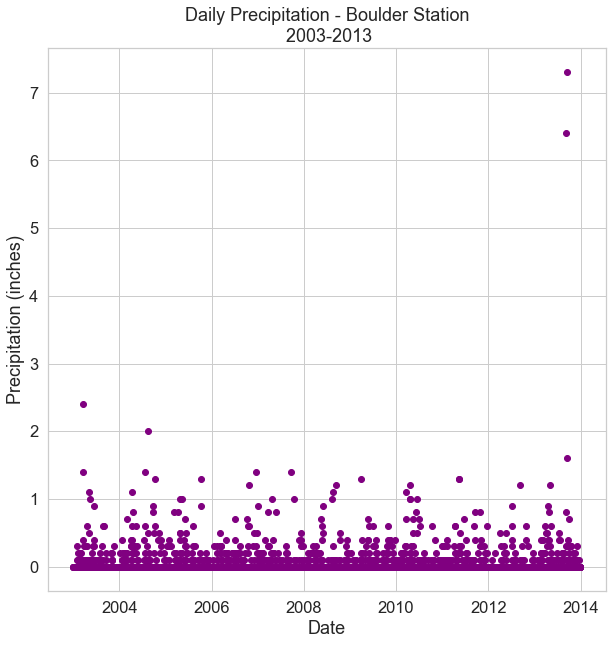

In [17]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_daily.index.values,
           precip_2003_2013_daily['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Precipitation - Boulder Station\n 2003-2013")

plt.show()

## Resample Daily Data to Monthly Data

### df.resample('M').sum()

#### with 'M' specifying that you want to aggregate, or resample, by month.

In [18]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_monthly = precip_2003_2013_daily.resample('M').sum()

precip_2003_2013_monthly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-31,1650.5,40.03389,-105.28111,0.0
2003-02-28,26408.0,640.54224,-1684.49776,1.4
2003-03-31,74272.5,1801.52505,-4737.64995,5.2
2003-04-30,28058.5,680.57613,-1789.77887,1.6
2003-05-31,34660.5,840.71169,-2210.90331,3.3
...,...,...,...,...
2013-08-31,14854.5,360.30420,-947.52990,1.0
2013-09-30,118836.0,2882.43360,-7580.23920,17.7
2013-10-31,31359.5,760.64220,-2000.34090,2.0


### Plot Monthly Precipitation Data

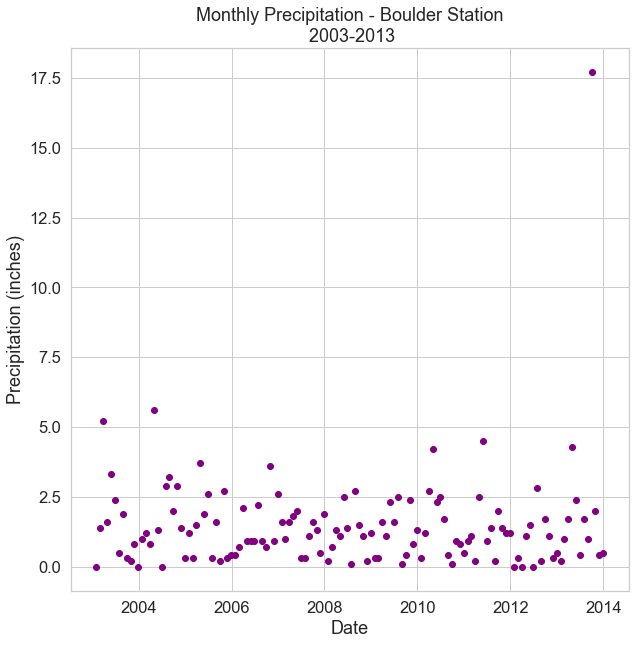

In [19]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_monthly.index.values,
           precip_2003_2013_monthly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Boulder Station\n 2003-2013")

plt.show()

## Resample Monthly Data to Yearly Data

#### df.resample('Y').sum()



In [20]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_yearly = precip_2003_2013_monthly.resample('Y').sum()

precip_2003_2013_yearly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-12-31,255827.5,6205.25295,-16318.57205,17.6
2004-12-31,349906.0,8487.18468,-22319.59532,22.6
2005-12-31,292138.5,7085.99853,-18634.75647,16.7
2006-12-31,278934.5,6765.72741,-17792.50759,16.8
2007-12-31,259128.5,6285.32073,-16529.13427,15.0
2008-12-31,239322.5,5804.91405,-15265.76095,14.0
2009-12-31,250876.0,6085.13949,-16002.72741,14.7
2010-12-31,272332.5,6605.57700,-17371.38150,17.6
2011-12-31,300391.0,7286.15160,-19161.16020,17.5


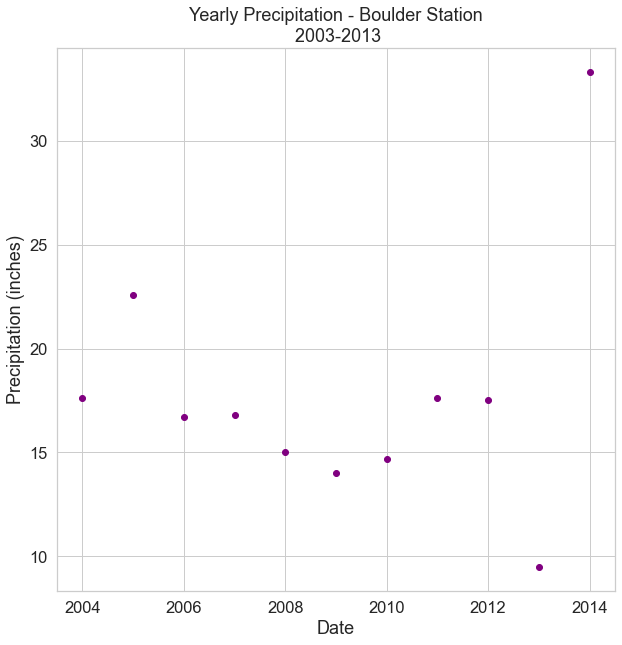

In [22]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_hourly.resample('Y').sum().index.values,
           precip_2003_2013_hourly.resample('Y').sum()['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Yearly Precipitation - Boulder Station\n 2003-2013")

plt.show()